## 1. INTRODUÇÃO

<img src='barragem.jpg'>

Barragens são barreiras artificiais utilizadas para reter o fluxo da água e então garantir o seu uso para alguma atividade qualquer. Outros usos comuns são: contenção de resíduos industriais e rejeitos de mineração, geração de hidrelétrica e até controle de enchentes. No Brasil, por exemplo, temos represas mundialmente famosas, como é o caso da Itaipu e Sobradinho.

Barragens podem ser feitas de todo tipo de material, conter diferentes dimensões, além de reter diferentes minérios. Isso tudo implica diversos riscos. Um dos casos mais famosos no Brasil foi a ruptura da barragem do Córrego do Feijão, em Brumadinho, Minas Gerais. 

(Samarco) Barragem de rejeitos é uma estrutura construída para o depósito dos rejeitos provenientes da mineração. O rejeito é o material que sobra quando se separa o minério da rocha e é depositado em forma de polpa, ou seja, uma mistura de sólidos e água. A barragem funciona como uma barreira, onde são depositados os rejeitos. À medida que o rejeito é depositado, a parte sólida se acomoda no fundo da barragem. A água decantada na parte superior é então drenada e tratada, com parte sendo reutilizada no processo de mineração e o restante devolvido ao meio ambiente. Com o passar do tempo, a barragem vai “secando”, até que deixa de receber rejeitos.

No Brasil, as barragens fazem parte do escopo de regulação da ANA - Agência Nacional de Águas e Saneamento Básico. A principal lei no que diz respeito às barragens é a lei 12.334/2010, chamada de Política Nacional de Segurança de Barragens. De acordo com o site da ANA, essa lei <i>cria regras para a acumulação de água, de resíduos industriais e a disposição final ou temporária de rejeitos. Essa política também estabelece que a Agência Nacional de Águas (ANA) é a responsável por organizar, implantar e gerir o Sistema Nacional de Informações sobre Segurança de Barragens (SNISB); promover a articulação entre os órgãos fiscalizadores de barragens; coordenar a elaboração do Relatório de Segurança de Barragens (RSB); e receber denúncias dos demais órgãos ou entidades fiscalizadores sobre qualquer não conformidade que implique em risco imediato à segurança ou qualquer acidente ocorrido nas barragens.</i>

Os dados apresentados neste notebook dizem respeito às informações referentes às barragens e comunidades afetadas. A coleta foi realizada em conjunto pelas comunidades de Data Science Cappra Data e DataScience4Industry e possui informações como:
- Localização, risco de disrupção e risco de dadnos de barragens que estão contempladas nas bases da ANM - Agência Nacional de Mineração;
- Dados do Censo de 2017, que podem ser usados para verificar a proximidade de um domicílio e uma barragem.

Fonte dos dados: https://www.kaggle.com/edumagalhaes/brazilian-dams-and-brumadinho-households

Mais sobre a ANA: https://www.ana.gov.br

Sobre a ANM: https://www.gov.br/anm/pt-br

Mais sobre o problema das barragens:
- https://istoe.com.br/minas-tem-42-das-45-barragens-de-mineracao-interditadas-no-pais/
- https://agenciabrasil.ebc.com.br/geral/noticia/2019-02/sancionada-lei-que-torna-regras-para-barragens-mais-rigidas-em-mg
- https://www.samarco.com/wp-content/uploads/2016/08/o-que-e-uma-barragem.pdf

<b>ALERTA: </b> Caso você não me conheça, tenha em mente que eu sou um mero matemático com mestrado em economia. Meu conhecimento em barragens e qualquer tema ambiental é mínimo. Tentei aprender com as ferramentas disponíveis, mas é possível que tenha cometido erros. Se você verificar algum equívoco, por favor me avise.

## 2. CARREGANDO BIBLIOTECAS

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# import folium

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import sys
import warnings

warnings.filterwarnings("ignore")

pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

#### Settings ###########
sns.set()
pd.options.display.max_columns = 500
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [10, 5]
%load_ext nb_black

<IPython.core.display.Javascript object>

## 3. ANÁLISE DOS DADOS DAS BARRAGENS

A análise dos dados teve início utilizando com base no notebook publicado no Kaggle por Igor Samiel e Filipe Theodoro. O trabalho dos dois pode ser acessado pelo seguinte link: https://www.kaggle.com/carlostomeh/panorama-geral-das-barragens-de-rejeito-no-brasil

In [3]:
# barragens -> Dados sobre Barragens brasileiras
barragens = pd.read_csv(
    "database_versao_LatLongDecimal_fonteANM_23_01_2019.csv",
    sep=",",
    decimal=",",
    dtype={
        "LATITUDE": "string",
        "LONGITUDE": "string",
        "NOME_BARRAGEM_MINERACAO": "string",
        "CPF_CNPJ": "string",
    },
)

# Primeiras linhas do dataset
barragens.head(3)

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE
0,0-1,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,22.00,"27,700,000.00",Baixa,Média,C,Sim,0.733361111111111,-60.1383888888889
1,103 (Cruz),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,10.30,"924,000.00",Baixa,Média,C,Sim,0.785722222222222,-60.1419166666667
2,111 (Índio),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.00,"48,873.00",Baixa,Média,C,Sim,0.789666666666667,-60.1442777777778


<IPython.core.display.Javascript object>

In [4]:
barragens.shape

(714, 15)

<IPython.core.display.Javascript object>

In [5]:
barragens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   NOME_BARRAGEM_MINERACAO   714 non-null    string
 1   NOME_DO_EMPREENDEDOR      714 non-null    object
 2   CPF_CNPJ                  714 non-null    string
 3   POSICIONAMENTO            714 non-null    object
 4   UF                        714 non-null    object
 5   MUNICIPIO                 714 non-null    object
 6   MINERIO_PRINCIPAL         714 non-null    object
 7   ALTURA_ATUAL_metros       714 non-null    object
 8   VOLUME_ATUAL_m3           714 non-null    object
 9   CATEGORIA_DE_RISCO        390 non-null    object
 10  DANO_POTENCIAL_ASSOCIADO  390 non-null    object
 11  CLASSE                    390 non-null    object
 12  INSERIDA_NA_PNSB          714 non-null    object
 13  LATITUDE                  714 non-null    string
 14  LONGITUDE                 

<IPython.core.display.Javascript object>

In [6]:
# Precisamos converter os campos de altura e volume de texto para o formato numérico
# Primeiro: troca virgula por espaço vazio. 27,700,700.00 em 27700700.00
barragens["ALTURA_ATUAL_metros"] = barragens["ALTURA_ATUAL_metros"].str.replace(",", "")
# Segundo: vieram hifens representando nulos. Trocar hifen por nulo
barragens["ALTURA_ATUAL_metros"] = barragens["ALTURA_ATUAL_metros"].replace("-", np.nan)
# Terceiro: converte para numerico
barragens["ALTURA_ATUAL_metros"] = pd.to_numeric(barragens["ALTURA_ATUAL_metros"])

barragens["VOLUME_ATUAL_m3"] = barragens["VOLUME_ATUAL_m3"].str.replace(",", "")
barragens["VOLUME_ATUAL_m3"] = barragens["VOLUME_ATUAL_m3"].replace("-", np.nan)
barragens["VOLUME_ATUAL_m3"] = pd.to_numeric(barragens["VOLUME_ATUAL_m3"])

# verifica resultado das alterações
barragens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NOME_BARRAGEM_MINERACAO   714 non-null    string 
 1   NOME_DO_EMPREENDEDOR      714 non-null    object 
 2   CPF_CNPJ                  714 non-null    string 
 3   POSICIONAMENTO            714 non-null    object 
 4   UF                        714 non-null    object 
 5   MUNICIPIO                 714 non-null    object 
 6   MINERIO_PRINCIPAL         714 non-null    object 
 7   ALTURA_ATUAL_metros       697 non-null    float64
 8   VOLUME_ATUAL_m3           707 non-null    float64
 9   CATEGORIA_DE_RISCO        390 non-null    object 
 10  DANO_POTENCIAL_ASSOCIADO  390 non-null    object 
 11  CLASSE                    390 non-null    object 
 12  INSERIDA_NA_PNSB          714 non-null    object 
 13  LATITUDE                  714 non-null    string 
 14  LONGITUDE 

<IPython.core.display.Javascript object>

In [7]:
barragens.head()

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE
0,0-1,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,22.0,27700000.0,Baixa,Média,C,Sim,0.733361111111111,-60.1383888888889
1,103 (Cruz),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,10.3,924000.0,Baixa,Média,C,Sim,0.785722222222222,-60.1419166666667
2,111 (Índio),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.0,48873.0,Baixa,Média,C,Sim,0.789666666666667,-60.1442777777778
3,158 (A-1),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,30.0,53380000.0,Baixa,Alta,B,Sim,0.738027777777778,-60.0789166666667
4,161 (A-2),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,22.0,1018054.0,Baixa,Média,C,Sim,0.732286944444444,-60.0689988888889


<IPython.core.display.Javascript object>

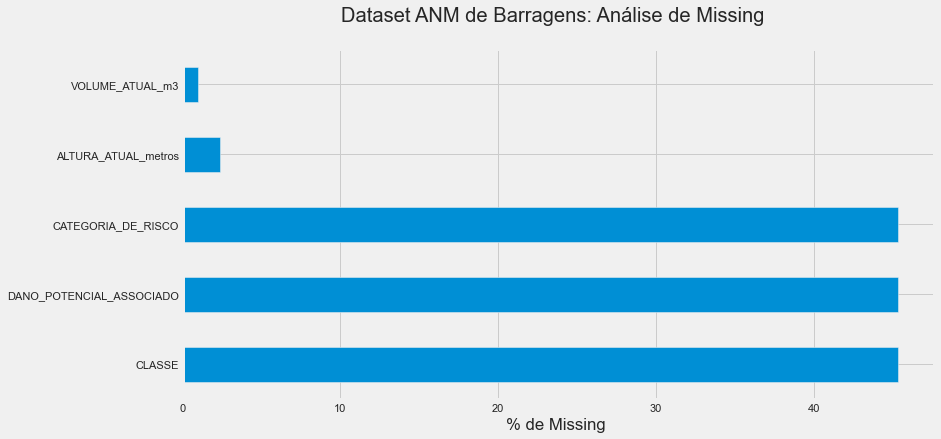

<IPython.core.display.Javascript object>

In [11]:
# % DE MISSING
na_cols = [
    col for col in barragens if (barragens[col].isna().sum() > 0)
]  # pega colunas que tem missing
ax = (
    barragens[na_cols]
    .isna()
    .mean()  # percentual de missing
    .sort_values(ascending=False)  # ordena de forma decrescente
    .mul(100)  # em centenas (ao inves de ser 0.45 vai ser 45)
    .plot(kind="barh", figsize=(12, 6))  # plota grafico de barras horizontal
)
_ = ax.set_xlabel("% de Missing ")  # titulo do eixo x
_ = ax.set_title("Dataset ANM de Barragens: Análise de Missing  \n")  # titulo principal

In [14]:
barragens[barragens["CATEGORIA_DE_RISCO"].isna()].head(4)

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE
390,22,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,6.0,56519.0,NaN,NaN,NaN,Não,0.738638888888889,-60.1673888888889
391,42,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,4.9,130979.0,NaN,NaN,NaN,Não,0.723527777777778,-60.1967222222222
392,69,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.0,84941.0,NaN,NaN,NaN,Não,0.743194444444444,-60.2014166666667
393,189,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.0,209969.0,NaN,NaN,NaN,Não,0.789555555555556,-60.0130277777778


<IPython.core.display.Javascript object>

O primeiro dado preocupante é a ausência da informação de risco para mais de 40% da base.<br> 

Meus primeiros questionamentos foram se seria isso um problema de como o dado foi levantado (autores fizeram algum download ou tratativa equivocada), de divulgação (ANM divulgou dados incompletos) ou mesmo de carência de regulação (nem todas as barragens precisam dessas avaliações de risco)?<br>

De cara, parecia-me pouco provável que o último possa ocorrer. Imagino que seja obrigatória a avaliação antes da construção da barragem, e essa avaliação seja o que gera essa classificação. Seria então ausência de transparência do órgão ou apenas que o dado não foi coletado? No Kaggle, não temos detalhes de como esses dados foram extraídos, o que dificulta um pouco mais a análise. Teria que entrar em contato com os autores. Achei que os dados estivessem no link http://www.snisb.gov.br/portal/snisb/relatorio-anual-de-seguranca-de-barragem/2017, mas não parece ser a mesma coisa. Olhando aqui https://app.anm.gov.br/SIGBM/Publico/ClassificacaoNacionalDaBarragem parece essa é a real fonte e que realmente temos missing na base. Por quê?

Estes questionamentos refletem boa parte do dia do cientista de dados: entender o que são os números. São falhas na interpretação deles ou na tarefa em que eles foram o resultado? É preciso entender com os donos da informação. Uma coisa que podemos ver é que há um padrão na altura e volume dos missings, são todos baixos. Veja no describe a seguir: 

In [15]:
barragens[barragens["CATEGORIA_DE_RISCO"].isna()].describe()

,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3
count,307.000000,3.170000e+02
mean,6.961922,1.417104e+05
std,3.739758,2.813656e+05
min,1.000000,1.000000e-02
25%,4.000000,5.250000e+03
50%,6.200000,2.000000e+04
75%,10.000000,1.400590e+05
max,14.900000,1.965306e+06


<IPython.core.display.Javascript object>

As barragens contendo missing possuem altura em metros menor do que 15. Talvez por isso não tenham tido essa avaliação de risco, por não se encaixarem na política nacional de segurança de barragens.

<img src = 'pnsb_criterios.png'>

In [17]:
barragens["dummy_PNSB"] = np.where(barragens["INSERIDA_NA_PNSB"] == "Sim", 1, 0)
barragens["dummy_PNSB"].value_counts()

1    390
0    324
Name: dummy_PNSB, dtype: int64

<IPython.core.display.Javascript object>

In [18]:
barragens["dummy_PNSB"].value_counts(normalize=True)

1    0.546218
0    0.453782
Name: dummy_PNSB, dtype: float64

<IPython.core.display.Javascript object>

In [19]:
# Resumo por minerio
resumo = (
    barragens.groupby(["MINERIO_PRINCIPAL"], sort=False)
    .agg(
        sum_pnsb=("dummy_PNSB", "sum"),
        max_altura=("ALTURA_ATUAL_metros", "max"),
        max_volume=("VOLUME_ATUAL_m3", "max"),
        media_altura=("ALTURA_ATUAL_metros", "mean"),
        media_volume=("VOLUME_ATUAL_m3", "mean"),
    )
    .reset_index()
)

resumo.sort_values(by="sum_pnsb").head()

,MINERIO_PRINCIPAL,sum_pnsb,max_altura,max_volume,media_altura,media_volume
56,Sais,0,6.00,6362.07,6.0000,6362.070000
44,Magnesita,0,4.78,52912.30,4.7800,52912.300000
45,Bentonita,0,14.00,7500.00,14.0000,7500.000000
46,Cromita,0,14.60,201205.00,6.7125,73405.428571
47,Areia Quartzosa,0,9.00,6897.00,6.2500,4034.000000


<IPython.core.display.Javascript object>

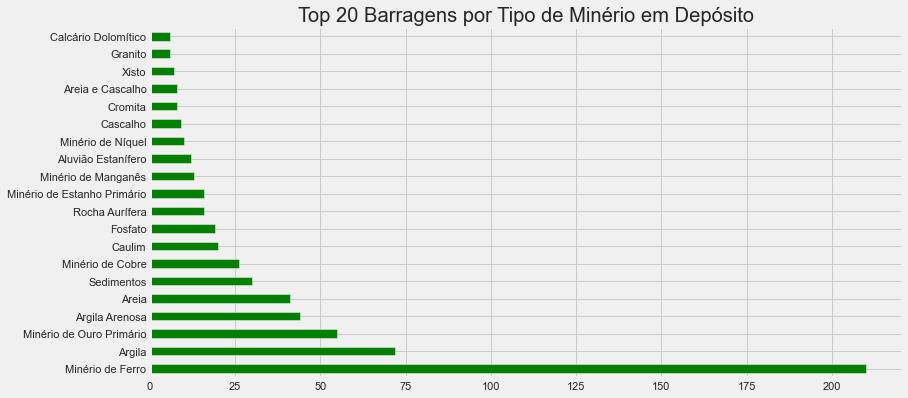

<IPython.core.display.Javascript object>

In [22]:
_ = plt.figure(1, figsize=(12, 6))
_ = barragens["MINERIO_PRINCIPAL"].value_counts()[:20].plot(kind="barh", color="green")
_ = plt.title("Quantidade de Barragens por Tipo de Minério em Depósito")

In [23]:
barragens[barragens["MINERIO_PRINCIPAL"] == "Minério de Ferro"].head(5)

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE,dummy_PNSB
12,VILA NOVA,Unamgen Mineração e Metalurgia S.a.,42.593.269/0001-79,Norte do Equador,AP,MAZAGÃO,Minério de Ferro,15.5,440300.0,Baixa,Baixa,E,Sim,0.401673888888889,-51.7578088888889,1
38,5 (MAC),Vale S A Filial: Vale Paraopeba,33.592.510/0035-01,Sul do Equador,MG,NOVA LIMA,Minério de Ferro,78.0,13718217.0,Baixa,Alta,B,Sim,-19.9770866666667,-43.8930027777778,1
39,5 (Mutuca),Vale S A Filial: Vale Paraopeba,33.592.510/0035-01,Sul do Equador,MG,NOVA LIMA,Minério de Ferro,55.0,7100000.0,Baixa,Alta,B,Sim,-20.0262258333333,-43.9425625,1
40,7B,Vale S A Filial: Vale Paraopeba,33.592.510/0035-01,Sul do Equador,MG,NOVA LIMA,Minério de Ferro,27.4,79431.0,Baixa,Alta,B,Sim,-19.967365,-43.8829791666667,1
41,8B,Vale S A Filial: Vale Paraopeba,33.592.510/0035-01,Sul do Equador,MG,NOVA LIMA,Minério de Ferro,28.0,92635.0,Baixa,Alta,B,Sim,-19.9594205555556,-43.8726,1


<IPython.core.display.Javascript object>

In [24]:
barragens = pd.concat(
    [
        barragens,
        pd.get_dummies(barragens["CATEGORIA_DE_RISCO"], prefix="Categoria_de_Risco"),
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [25]:
barragens.head()

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE,dummy_PNSB,Categoria_de_Risco_Alta,Categoria_de_Risco_Baixa,Categoria_de_Risco_Média
0,0-1,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,22.0,27700000.0,Baixa,Média,C,Sim,0.733361111111111,-60.1383888888889,1,0,1,0
1,103 (Cruz),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,10.3,924000.0,Baixa,Média,C,Sim,0.785722222222222,-60.1419166666667,1,0,1,0
2,111 (Índio),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.0,48873.0,Baixa,Média,C,Sim,0.789666666666667,-60.1442777777778,1,0,1,0
3,158 (A-1),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,30.0,53380000.0,Baixa,Alta,B,Sim,0.738027777777778,-60.0789166666667,1,0,1,0
4,161 (A-2),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,22.0,1018054.0,Baixa,Média,C,Sim,0.732286944444444,-60.0689988888889,1,0,1,0


<IPython.core.display.Javascript object>

In [26]:
barragens.groupby("CATEGORIA_DE_RISCO")["ALTURA_ATUAL_metros"].mean()

CATEGORIA_DE_RISCO
Alta     28.666667
Baixa    27.960723
Média    16.377273
Name: ALTURA_ATUAL_metros, dtype: float64

<IPython.core.display.Javascript object>

In [27]:
barragens.groupby("CATEGORIA_DE_RISCO")["VOLUME_ATUAL_m3"].mean()

CATEGORIA_DE_RISCO
Alta     3.380292e+05
Baixa    8.960697e+06
Média    2.019007e+06
Name: VOLUME_ATUAL_m3, dtype: float64

<IPython.core.display.Javascript object>

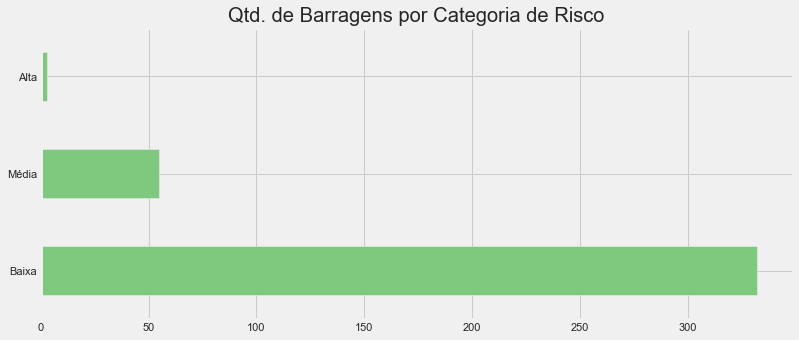

<IPython.core.display.Javascript object>

In [29]:
_ = plt.figure(1, figsize=(12, 5))
_ = barragens["CATEGORIA_DE_RISCO"].value_counts().plot(kind="barh", colormap="Accent")
_ = plt.title("Qtd. de Barragens por Categoria de Risco")

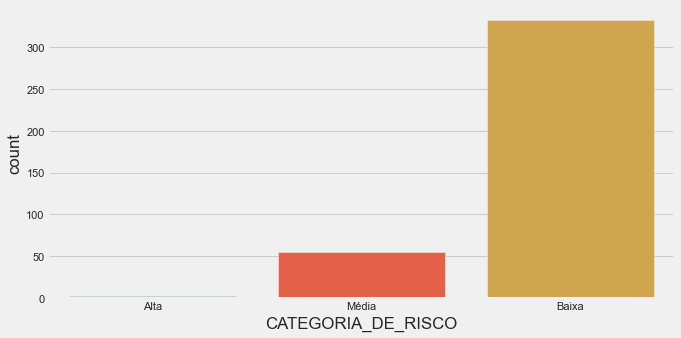

<IPython.core.display.Javascript object>

In [31]:
_ = sns.countplot(
    x="CATEGORIA_DE_RISCO",
    data=barragens,
    order=barragens["DANO_POTENCIAL_ASSOCIADO"].value_counts().index,
)

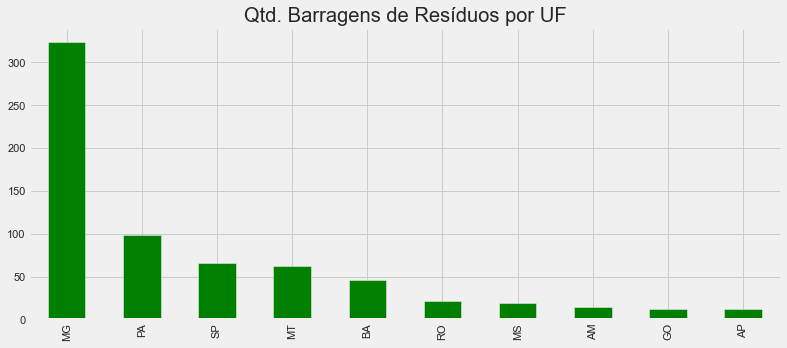

<IPython.core.display.Javascript object>

In [33]:
## Quantidade de Barragens X UF
_ = plt.figure(1, figsize=(12, 5))
_ = barragens["UF"].value_counts()[:10].plot(kind="bar", color="green")
_ = plt.title("Qtd. Barragens de Resíduos por UF")

In [35]:
barragens = pd.concat(
    [
        barragens,
        pd.get_dummies(barragens["DANO_POTENCIAL_ASSOCIADO"], "Dano_Potencial_"),
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

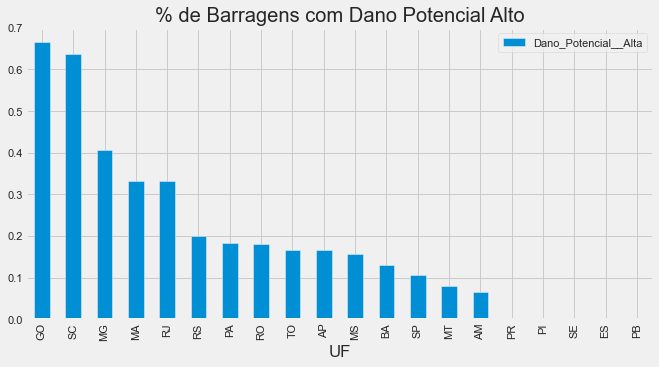

<IPython.core.display.Javascript object>

In [36]:
# Algum estado possui mais barragens por risco?
_ = (
    pd.pivot_table(
        data=barragens, index=["UF"], values=["Dano_Potencial__Alta"], aggfunc="mean"
    )
    .sort_values(by="Dano_Potencial__Alta", ascending=False)
    .plot(kind="bar")
)
_ = plt.title("% de Barragens com Dano Potencial Alto")

In [37]:
# Risco de acordo com UF
resumo_por_uf = (
    barragens.groupby(["UF"], sort=False)
    .agg(
        contagem_geral=("Dano_Potencial__Alta", "count"),
        contagem_por_risco_alto=("Dano_Potencial__Alta", "sum"),
        perc_de_risco_alto=("Dano_Potencial__Alta", "mean"),
        Missing_Risco=("CATEGORIA_DE_RISCO", lambda x: x.isnull().mean(),),
        Missing_Dano=("DANO_POTENCIAL_ASSOCIADO", lambda x: x.isnull().mean(),),
    )
    .reset_index()
    .round(1)
)

resumo_por_uf.sort_values(by="contagem_geral", ascending=False).head()

,UF,contagem_geral,contagem_por_risco_alto,perc_de_risco_alto,Missing_Risco,Missing_Dano
6,MG,324,132,0.4,0.4,0.4
9,PA,98,18,0.2,0.3,0.3
16,SP,66,7,0.1,0.7,0.7
8,MT,62,5,0.1,0.5,0.5
2,BA,46,6,0.1,0.7,0.7


<IPython.core.display.Javascript object>

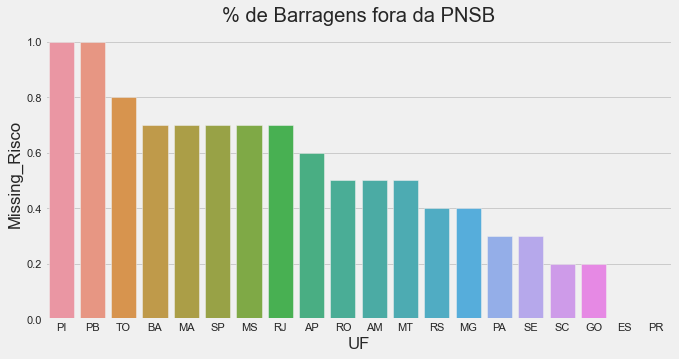

<IPython.core.display.Javascript object>

In [40]:
_ = sns.barplot(
    data=resumo_por_uf.sort_values(by="Missing_Risco", ascending=False),
    x="UF",
    y="Missing_Risco",
)
_ = plt.title("% de Barragens fora da PNSB")

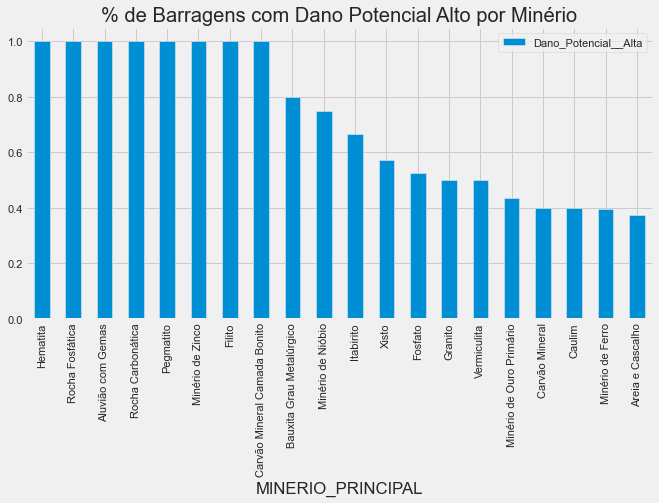

<IPython.core.display.Javascript object>

In [42]:
# E o risco por material
_ = (
    pd.pivot_table(
        data=barragens,
        index=["MINERIO_PRINCIPAL"],
        values=["Dano_Potencial__Alta"],
        aggfunc="mean",
    )
    .sort_values(by="Dano_Potencial__Alta", ascending=False)
    .head(20)
    .plot(kind="bar")
)
_ = plt.title("% de Barragens com Dano Potencial Alto por Minério")